In [1]:
using Pkg; Pkg.instantiate(); Pkg.precompile()

Precompiling project...


In [2]:
using Random; Random.seed!(2000);

# Gaussian processes

In this tutorial, we explain how to obtain the functionality of other packages such as GaussianProcesses.jl with GeoStats.jl. Gaussian process regression and Simple Kriging are essentially [two names for the same concept](https://en.wikipedia.org/wiki/Kriging). The derivation of Kriging estimators, however; does **not** require distributional assumptions. [Matheron](https://en.wikipedia.org/wiki/Georges_Matheron) and other important geostatisticians have generalized Gaussian processes to random fields with locally-varying mean and for situations where the mean is unknown. GeoStats.jl includes Gaussian process regression as a special case as well as other more practical Kriging variants.

In machine learning, Gaussian processes are usually explained in 1D, and we will do the same here.

## The data

Let's start by drawing a set of points in the real line, each with a known value:

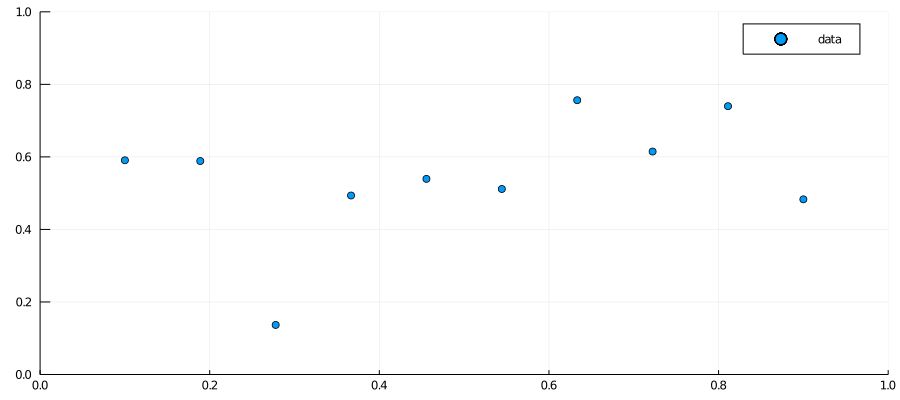

In [3]:
using Plots; gr(size=(900,400), xlim=(0,1), ylim=(0,1))

x = range(0.1, stop=.9, length=10)
z = rand(10)

scatter(x, z, label="data")

We will skip an important step known in geostatistics as *variogram modeling*, and will proceed to the estimation step directly in order to avoid having too many concepts in this tutorial. These concepts are likely new to practioners of machine learning and can be very useful in practice. For more information on variogram modeling, please check the other tutorials in this folder.

## Simple Kriging

In simple Kriging, we need to specify a mean and a covariance-type function in order to interpolate the stochastic process at unseen locations. We choose a covariance (or variogram) model in GeoStats.jl and interact with the parameters:

In [4]:
using GeoStats
using Interact

# points where to make predictions
n  = 200
xs = range(0., stop=1, length=n)

@manipulate for s=range(.0, stop=.1, length=50),
                r=range(.1, stop=.2, length=50)
    # create Kriging estimator
    μ = 0.5
    γ = GaussianVariogram(sill=s, range=r)
    sk = SimpleKriging(x', z, γ, μ)
    
    # conditional mean and variance
    μs = zeros(n)
    σ² = zeros(n)
    ps = [predict(sk, [xₒ]) for xₒ in xs]
    μs = first.(ps)
    σs = sqrt.(last.(ps))
    
    scatter(x, z, label="data")
    plot!(xs, μs, ribbon=σs, fillalpha=.5, label="Simple Kriging")
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-511280190284159348\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8606703807364568493\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-511280190284159348\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/juliohm/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/juliohm/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/juliohm/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007ff1ab7b0760, Task (runnable) @0x00007ff1ab7b0760), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.00204082\",\"0.00408163\",\"0.00612245\",\"0.00816327\",\"0.0102041\",\"0.0122449\",\"0.0142857\",\"0.0163265\",\"0.0183673\",\"0.0204082\",\"0.022449\",\"0.0244898\",\"0.0265306\",\"0.0285714\",\"0.0306122\",\"0.0326531\",\"0.034693

## Ordinary Kriging

An immediate generalization of Simple Kriging is Ordinary Kriging. In this case, we still have the assumption that the mean of the field is constant, but this time we treat it as an unknown. Below is the estimation with Ordinary Kriging where we only need to specify the covariance-type function:

In [5]:
using GeoStats
using Interact

# points where to make predictions
n  = 200
xs = range(0., stop=1, length=n)

@manipulate for s=range(.0, stop=.1, length=50),
                r=range(.1, stop=.2, length=50)
    # create Kriging estimator
    γ = GaussianVariogram(sill=s, range=r)
    ok = OrdinaryKriging(x', z, γ)
    
    # conditional mean and variance
    μs = zeros(n)
    σ² = zeros(n)
    ps = [predict(ok, [xₒ]) for xₒ in xs]
    μs = first.(ps)
    σs = sqrt.(last.(ps))
    
    scatter(x, z, label="data")
    plot!(xs, μs, ribbon=σs, fillalpha=.5, label="Ordinary Kriging")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/juliohm/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/juliohm/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/juliohm/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007ff1abbc0280, Task (runnable) @0x00007ff1abbc0280), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.00204082\",\"0.00408163\",\"0.00612245\",\"0.00816327\",\"0.0102041\",\"0.0122449\",\"0.0142857\",\"0.0163265\",\"0.0183673\",\"0.0204082\",\"0.022449\",\"0.0244898\",\"0.0265306\",\"0.0285714\",\"0.0306122\",\"0.0326531\",\"0.034693

# Other generalizations

- We can also have random fields with non-constant mean. In Universal Kriging, the mean is a polynomial on the coordinates of the problem up to a certain degree specified by the user. In External Drift Kriging, the mean can be any external variable (a.k.a. external drift).

- All methods in GeoStats.jl accept general distance functions. We can for example use the Haversine distance to compute covariances between latitude/longitude coordinates directly.

- Other methods for co-estimation and co-simulation will be available in future releases.